Text Mining - 3. NLTK

AFI - Máster en Data Science y Big Data

Juan de Dios Romero Palop

Abril 2022


In [14]:
import nltk

In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Tokenización frases

In [16]:
from nltk.tokenize import sent_tokenize

In [17]:
## Quizas necesiteis esto la primera vez
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
texto = '''Primera parte del Ingenioso hidalgo Don Quijote de la Mancha.
Capitulo Primero. Que trata de la condicion y ejercicio del famoso hidalgo don Quijote de la Mancha.'''
sent_tokenize(texto)

['Primera parte del Ingenioso hidalgo Don Quijote de la Mancha.',
 'Capitulo Primero.',
 'Que trata de la condicion y ejercicio del famoso hidalgo don Quijote de la Mancha.']

Aunque en este ejemplo no se aprecia porque el texto es muy pequeño **sent_tokenize** no es la manera más óptima de tokenizar. Para textos grandes es mucho más rápido hacerlo de la siguiente manera:

In [19]:
import nltk.data

texto_en = '''To be or not to be. That is the question'''
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer.tokenize(texto_en)

['To be or not to be.', 'That is the question']

Soporte para multiples idiomas

In [20]:
texto_esp = "¡Hola! ¿Cómo te llamas? Me llamo D. Tomás"
spanish_tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
spanish_tokenizer.tokenize(texto_esp)

['¡Hola!', '¿Cómo te llamas?', 'Me llamo D. Tomás']

### Tokenización palabras

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
word_tokenize(texto)

['Primera',
 'parte',
 'del',
 'Ingenioso',
 'hidalgo',
 'Don',
 'Quijote',
 'de',
 'la',
 'Mancha',
 '.',
 'Capitulo',
 'Primero',
 '.',
 'Que',
 'trata',
 'de',
 'la',
 'condicion',
 'y',
 'ejercicio',
 'del',
 'famoso',
 'hidalgo',
 'don',
 'Quijote',
 'de',
 'la',
 'Mancha',
 '.']

In [23]:
# RETO: ¿Cómo combinamos ambas funciones para obtener por separado las palabras de cada frase? 

### Part of Speech

In [24]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
text = "Where do you live? In New York. I luv NY."
pos_tag(word_tokenize(text))

[('Where', 'WRB'),
 ('do', 'VB'),
 ('you', 'PRP'),
 ('live', 'VB'),
 ('?', '.'),
 ('In', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('.', '.'),
 ('I', 'PRP'),
 ('luv', 'VBP'),
 ('NY', 'NNP'),
 ('.', '.')]

In [26]:
from nltk import chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

https://www.nltk.org/book/ch07.html

In [71]:
chunk.ne_chunk(pos_tag(word_tokenize(text))).draw()

### Stemming

In [28]:
porter = nltk.PorterStemmer()

In [29]:
words = ['caresses', 'flies', 'dies', 'mules', 'denied', 'died', 'agreed', 'owned', 'humbled', 'sized',
'meeting', 'stating', 'siezing', 'itemization','sensational', 'traditional', 'reference', 'colonizer','plotted']
[porter.stem(word) for word in words]

['caress',
 'fli',
 'die',
 'mule',
 'deni',
 'die',
 'agre',
 'own',
 'humbl',
 'size',
 'meet',
 'state',
 'siez',
 'item',
 'sensat',
 'tradit',
 'refer',
 'colon',
 'plot']

In [30]:
from nltk.stem.snowball import SnowballStemmer
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [31]:
stemmer = SnowballStemmer("spanish")
palabras = ['tuvo', 'traje', 'había', 'hubo', 'elefantes', 'infanta', 'infantas', 'infantil', 'infancia', 'motor', 'Quijote']
[stemmer.stem(palabra) for palabra in palabras]

['tuv',
 'traj',
 'hab',
 'hub',
 'elef',
 'infant',
 'infant',
 'infantil',
 'infanci',
 'motor',
 'quijot']

### Lemmatizacion

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [33]:
lemmatizer = nltk.WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


### NER

In [34]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [35]:
text = "Microsoft Corp. is looking at buying United Kingdom startup for 175 million American Dollars, Peter Parker from NY Times says"
print(nltk.ne_chunk(pos_tag(word_tokenize(text))))

(S
  (ORGANIZATION Microsoft/NNP Corp./NNP)
  is/VBZ
  looking/VBG
  at/IN
  buying/VBG
  (GPE United/NNP Kingdom/NNP)
  startup/NN
  for/IN
  175/CD
  million/CD
  (ORGANIZATION American/JJ Dollars/NNP)
  ,/,
  (PERSON Peter/NNP Parker/NNP)
  from/IN
  (ORGANIZATION NY/NNP Times/NNP)
  says/VBZ)


### Stopwords

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
stop_words = set(stopwords.words('english'))

In [38]:
list(stop_words)[1:10]

['aren', 'below', 'we', 'couldn', 'wasn', 'these', 'is', 'during', 'why']

In [39]:
text = '''In computing, stop words are words which are filtered out before or after processing of natural language data (text).
 Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. 
 Some tools specifically avoid removing these stop words to support phrase search.'''
tokens = [token for token in word_tokenize(text) if token not in stop_words]
print('Original: %s' % (text))
print()
print(tokens)

Original: In computing, stop words are words which are filtered out before or after processing of natural language data (text).
 Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. 
 Some tools specifically avoid removing these stop words to support phrase search.

['In', 'computing', ',', 'stop', 'words', 'words', 'filtered', 'processing', 'natural', 'language', 'data', '(', 'text', ')', '.', 'Though', '``', 'stop', 'words', "''", 'usually', 'refers', 'common', 'words', 'language', ',', 'single', 'universal', 'list', 'stop', 'words', 'used', 'natural', 'language', 'processing', 'tools', ',', 'indeed', 'tools', 'even', 'use', 'list', '.', 'Some', 'tools', 'specifically', 'avoid', 'removing', 'stop', 'words', 'support', 'phrase', 'search', '.']


In [40]:
customize_stop_words = [
    'computing', 'filtered'
]

stop_words.update(customize_stop_words)
tokens = [token for token in word_tokenize(text) if token not in stop_words]
print('Original: %s' % (text))
print()
print(tokens)

Original: In computing, stop words are words which are filtered out before or after processing of natural language data (text).
 Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. 
 Some tools specifically avoid removing these stop words to support phrase search.

['In', ',', 'stop', 'words', 'words', 'processing', 'natural', 'language', 'data', '(', 'text', ')', '.', 'Though', '``', 'stop', 'words', "''", 'usually', 'refers', 'common', 'words', 'language', ',', 'single', 'universal', 'list', 'stop', 'words', 'used', 'natural', 'language', 'processing', 'tools', ',', 'indeed', 'tools', 'even', 'use', 'list', '.', 'Some', 'tools', 'specifically', 'avoid', 'removing', 'stop', 'words', 'support', 'phrase', 'search', '.']


In [41]:
stop_words = set(stopwords.words('spanish'))
list(stop_words)[1:10]

['otras',
 'tuya',
 'serías',
 'estabais',
 'nos',
 'tuviesen',
 'tengas',
 'tenidas',
 'una']

In [42]:
texto = '''Primera parte del Ingenioso hidalgo Don Quijote de la Mancha.
Capitulo Primero. Que trata de la condicion y ejercicio del famoso hidalgo don Quijote de la Mancha.'''

tokens = [token for token in word_tokenize(texto) if token not in stop_words]
print('Original: %s' % (texto))
print()
print(tokens)

Original: Primera parte del Ingenioso hidalgo Don Quijote de la Mancha.
Capitulo Primero. Que trata de la condicion y ejercicio del famoso hidalgo don Quijote de la Mancha.

['Primera', 'parte', 'Ingenioso', 'hidalgo', 'Don', 'Quijote', 'Mancha', '.', 'Capitulo', 'Primero', '.', 'Que', 'trata', 'condicion', 'ejercicio', 'famoso', 'hidalgo', 'don', 'Quijote', 'Mancha', '.']


### Texts functions

In [72]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [44]:
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
from nltk.book import *

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\genesis.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\nps_chat.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [45]:
text3.concordance("lord")

Displaying 25 of 207 matches:
y were created , in the day that the LORD God made the earth and the heavens ,
rb of the field before it gr for the LORD God had not caused it to rain upon t
e whole face of the ground . And the LORD God formed man of the dust of the gr
d man became a living soul . And the LORD God planted a garden eastward in Ede
med . And out of the ground made the LORD God to grow every tree that is pleas
 fourth river is Euphrates . And the LORD God took the man , and put him into 
to dress it and to keep it . And the LORD God commanded the man , saying , Of 
reof thou shalt surely die . And the LORD God said , It is not good that the m
 for him . And out of the ground the LORD God formed every beast of the field 
found an help meet for him . And the LORD God caused a deep sleep to fall upon
ad thereof ; And the rib , which the LORD God had taken from man , made he a w
han any beast of the field which the LORD God had made . And he said unto the 
ns . And they heard th

In [46]:
text2.concordance("lord")

Displaying 25 of 29 matches:
 they have something else to do ." " Lord ! Anne ," cried her sister , " you c
 her invitation immediately . " Oh , Lord ! I am sure your mother can spare yo
 if not both of them , I must have . Lord bless me ! how do you think I can li
ave had Cartwright to settle with -- Lord , I have been as busy as a bee ever 
 wine ! And the dried cherries too ! Lord ! nothing seems to do her any good .
de , and next to none on the other , Lord bless you ! they care no more about 
ame her own supper , and go to bed . Lord ! no wonder she has been looking so 
e like to be laughed at about them . Lord ! how concerned Sir John and my daug
 madam will easily believe ." " Oh ! Lord ! yes , that I do indeed . It must b
hey an ' t married by Mid - summer . Lord ! how he ' ll chuckle over this news
such a mulberry tree in one corner ! Lord ! how Charlotte and I did stuff the 
from one hour ' s end to another . ' Lord ! here comes your beau , Nancy ,' my
s Morton , only daughte

In [47]:
text6.concordance("lord")

Displaying 12 of 12 matches:
 at Camelot . I must speak with your lord and master . SOLDIER # 1 : What ? Ri
ve there . ARTHUR : Then who is your lord ? WOMAN : We don ' t have a lord . A
our lord ? WOMAN : We don ' t have a lord . ARTHUR : What ? DENNIS : I told yo
is mine ! [ kneeling ] We thank Thee Lord , that in Thy mer -- BLACK KNIGHT : 
 ARTHUR : I ' m averting my eyes , O Lord . GOD : Well , don ' t . It ' s like
 . Now knock it off ! ARTHUR : Yes , Lord . GOD : Right ! Arthur , King of the
 dark times . ARTHUR : Good idea , O Lord ! GOD : ' Course it ' s a good idea 
T : A blessing ! A blessing from the Lord ! GALAHAD : God be praised SCENE 8 :
and grenade up on high , saying ,' O Lord , bless this thy hand grenade that w
 tiny bits , in thy mercy .' And the Lord did grin , and the people did feast 
, Brother . SECOND BROTHER : And the Lord spake , saying , ' First shalt thou 
biters . ARTHUR : In the name of the Lord , we demand entrance to this sacred 


In [48]:
test = "This is a test. This is a second test. I like testing!"
nltk.Text(word_tokenize(test)).concordance("test")

Displaying 2 of 2 matches:
This is a test . This is a second test . I like tes
This is a test . This is a second test . I like testing !


In [49]:
text1.similar("lord")

whale sea ship captain boat night time deck pequod hand world one day
side water way air line crew door


In [50]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [51]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [52]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


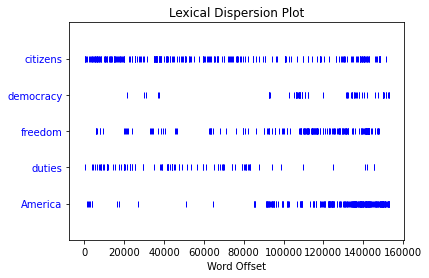

In [53]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

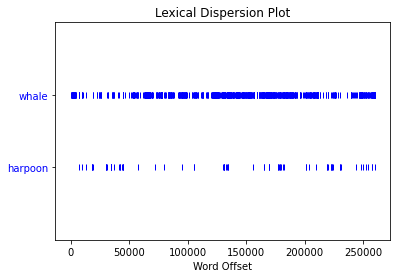

In [54]:
text1.dispersion_plot(["whale", "harpoon"])

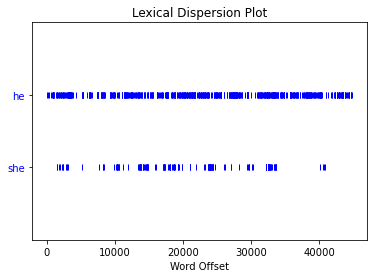

In [55]:
text3.dispersion_plot(["he","she"])

In [56]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [57]:
text6.collocations(num=15)

BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON


### Word Net

In [58]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Definición. 
syns = wordnet.synsets("dog")
syns[0].definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [60]:
# Ejemplo de uso
syns[0].examples()

['the dog barked all night']

In [61]:
# Sinónimos. El primer sinónimo es la propia palabra.
synonyms = []
 
for syn in wordnet.synsets('dog'):
 
    for lemma in syn.lemmas():
 
        synonyms.append(lemma.name())
 
print(synonyms)

['dog', 'domestic_dog', 'Canis_familiaris', 'frump', 'dog', 'dog', 'cad', 'bounder', 'blackguard', 'dog', 'hound', 'heel', 'frank', 'frankfurter', 'hotdog', 'hot_dog', 'dog', 'wiener', 'wienerwurst', 'weenie', 'pawl', 'detent', 'click', 'dog', 'andiron', 'firedog', 'dog', 'dog-iron', 'chase', 'chase_after', 'trail', 'tail', 'tag', 'give_chase', 'dog', 'go_after', 'track']


In [62]:
[syn.definition() for syn in syns]

['a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds',
 'a dull unattractive unpleasant girl or woman',
 'informal term for a man',
 'someone who is morally reprehensible',
 'a smooth-textured sausage of minced beef or pork usually smoked; often served on a bread roll',
 'a hinged catch that fits into a notch of a ratchet to move a wheel forward or prevent it from moving backward',
 'metal supports for logs in a fireplace',
 'go after with the intent to catch']

In [63]:
syns[3].examples()

['you dirty dog']

In [64]:
# Antónimos
antonyms = []
 
for syn in wordnet.synsets("small"):
 
    for l in syn.lemmas():
 
        if l.antonyms():
 
            antonyms.append(l.antonyms()[0].name())
 
print(antonyms)

['large', 'big', 'big']


In [65]:
nltk.download('omw')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\jherraez\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw.zip.


True

In [66]:
sorted(wordnet.langs())

['als',
 'arb',
 'bul',
 'cat',
 'cmn',
 'dan',
 'ell',
 'eng',
 'eus',
 'fas',
 'fin',
 'fra',
 'glg',
 'heb',
 'hrv',
 'ind',
 'ita',
 'jpn',
 'nld',
 'nno',
 'nob',
 'pol',
 'por',
 'qcn',
 'slv',
 'spa',
 'swe',
 'tha',
 'zsm']

In [67]:
wordnet.synsets("perro", lang = 'spa')

[Synset('dog.n.01'), Synset('rotter.n.01')]

In [68]:
wordnet.synsets("dog")[0].lemma_names('spa')

['can', 'perro']

In [69]:
wordnet.synsets("dog")[0].lemma_names('tha')

['หมา', 'สุนัข', 'หมาบ้าน']

In [70]:
wordnet.synsets('หมา', lang = 'tha')

[Synset('dog.n.01')]